# Imputation Methods for Missing Data - Comparison Study

+ [Simple Imputer working well to Impute the Numerical Missing Data](#simpleimputer_numerical)
+ [Simple Imputer Issue with Categorical Variable](#simpleimputer_categorical)

### Comprehensive Comparison of Imputation Methods (Basic to Advanced) for Missing Values.

In the dynamic realm of data analysis, the presence of missing values in datasets is a common challenge that can significantly impact the reliability and accuracy of analyses. Missing values in datasets can cause problems when we're trying to analyze data or build machine learning models. These gaps in information make it hard to get a complete picture and can lead to incorrect conclusions. When we analyze data, missing values can mess up our calculations and create biases in the results.

In machine learning, models may not work well if the data is incomplete, making predictions less accurate. Mishandling missing data can also lead to wrong decisions based on flawed information. That's why it's crucial to explore different ways to fill in these missing values, so we can make our analyses and models more reliable and effective.The art and science of imputation, or the process of filling in these missing values, has spawned a multitude of techniques, each with its unique strengths and limitations.

In this blog, we embark on a journey to unravel the intricacies of various imputation methods, exploring their theoretical foundations and practical implementations. From traditional approaches like mean imputation to sophisticated methodologies such as k-nearest neighbors and multiple imputation, we will dissect the nuances of each, providing readers with valuable insights to navigate the complex terrain of missing data handling. 

Join us as we delve into the fascinating landscape of imputation methods, demystifying their roles in enhancing the robustness of datasets and empowering data scientists and analysts to make informed decisions in the face of missing information.



#### We will use the `houses-prices dataset`, and try to sort out the best method of imputation by imputing the missing values by using the following methods:

- Dataset is downloaded from the this [link](https://www.kaggle.com/competitions/home-data-for-ml-course/data)

**<a id="content_list">Content List:</a>**

1. [Mean / Median / Mode Imputation](#mean_imputation)
2. [Random Values Imputation](#random_imputation)
3. [Forward Fill / Backward Fill](#forward_backword_imputation)
4. [K-Nearest Neighbors (KNN) Imputation](#knn_imputation)
5. [Multivariate Iterative Inpmputer](#iterative_imputation)

#### **Import Basic Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### **Import the Dataset**

In [3]:
# importing the training dataset.
df = pd.read_csv('../House_Prices_Prediction/train.csv')

In [4]:
# Set the option to display all features of the dataframe.
pd.set_option('display.max_columns', None)

In [5]:
# display the first 5 rows of the training dataset.
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### **Subsetting the Dataset**

> There are a lot of `numerical & categorical features` in the dataset, but we will keep few of the `features` based on the `domain-knowledge`, those can effect on the `hourse-price` as per the autor's understanding. So, we can compare the different imputation techniques instead of putting the effort on data cleaning and feature engineering type of work.

In [6]:
# Creating the list of categorical features, those we will keep.
test_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'GarageType', 'SaleCondition', 'LotFrontage', 'Fence', 'Utilities']
train_features = test_features + ['SalePrice']

In [7]:
# Subsetting the dataset with the required features.
df = df[train_features]

In [8]:
# show the number of duplicated rows in the dataset.
df.duplicated().sum()

0

#### **Exploring the Dataset for Missing Values**

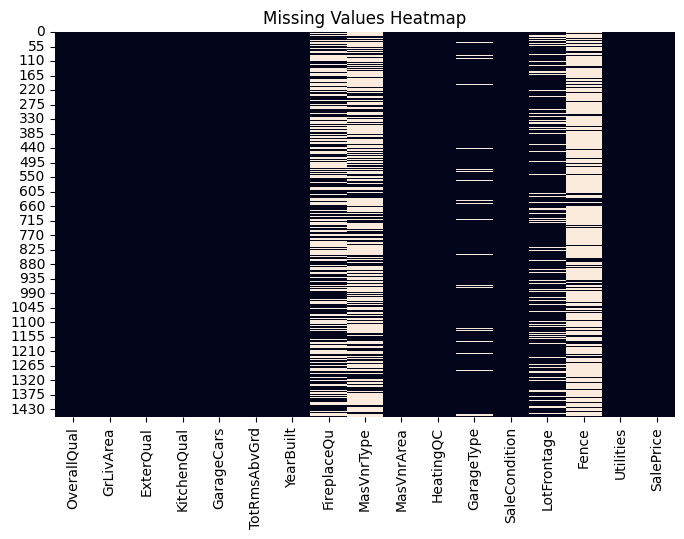

In [9]:
# Creating the heatmap to display the missing values.
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [10]:
# display the percentage of missing values in the columns where the sum-of-missing-values is greater than 0.
(df.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False)

Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
GarageType      5.547945
MasVnrArea      0.547945
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   ExterQual      1460 non-null   object 
 3   KitchenQual    1460 non-null   object 
 4   GarageCars     1460 non-null   int64  
 5   TotRmsAbvGrd   1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   FireplaceQu    770 non-null    object 
 8   MasVnrType     588 non-null    object 
 9   MasVnrArea     1452 non-null   float64
 10  HeatingQC      1460 non-null   object 
 11  GarageType     1379 non-null   object 
 12  SaleCondition  1460 non-null   object 
 13  LotFrontage    1201 non-null   float64
 14  Fence          281 non-null    object 
 15  Utilities      1460 non-null   object 
 16  SalePrice      1460 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 194

> **Observation:**\
    \
    The following features having missing values in the dataset:\
    `Fence`, `MasVnrType`, `FireplaceQu`, `LotFrontage`, `GarageType`, `MasVnrArea`.\
    \
    Numeric Features: `LotFrontage`, `MasVnrArea` \
    Categorical Features: `Fence`, `MasVnrType`, `FireplaceQu`, `GarageType`

---

#### **Important Note:**

> After checking the `description` file of the dataset, I found there are some categorical features with the following characteristic:\
    \
    **Fence:** &emsp; Fence Quality\
            **GdPrv:** &emsp; Good Privacy\
            **MnPrv:** &emsp; Minimum Privacy\
            **GdWo:**  &emsp; Good Wood\
            **MnWw:**  &emsp; Minimum Wood/Wire\
            **NA:** 	&emsp;&emsp; No Fence\
            \
            Here, `NA` does not means the `missing-value`.
            \
            So, we should impute the `NA` values with `"No Fence"` keyword.\
            \
            Firstly, We will use the regular mentioned methods to fill the missing values and compare the results.\
            \
            At the end, we will fill the missing values with "No Value" keyword in such features, and finally check the improvement in our resutls, if any.

---

#### **Separate the input and output features**

In [12]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

#### **Split the Train & Test Data**

In [13]:
# Import the 'train_test_split' function from the 'sklearn.model_selection' library.
from sklearn.model_selection import train_test_split

# Split the train and test data from the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### **<a id="mean_imputation">1. Mean / Median / Mode Imputation**</a>

[Back to Content List](#content_list)

- Import the `SimpleImputer` function from `sklearn`.

In [14]:
# Import the 'SimpleImputer' class from the 'sklearn' library.
from sklearn.impute import SimpleImputer

- Create the `objects` by using `SimpleImputer` with `mean`, `median` & `most_frequent` strategies, respectively.

In [15]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

- Apply the `SimpleImputer` object of `mean` & `median` on numerical features to impute the missing values.

In [16]:
# Impute the missing values to the numerical columns in the X_train & X_test.
X_train['LotFrontage_mean'] = mean_imputer.fit_transform(X_train[['LotFrontage']])
X_test['LotFrontage_mean'] = mean_imputer.transform(X_test[['LotFrontage']])

X_train['MasVnrArea_mean'] = mean_imputer.fit_transform(X_train[['MasVnrArea']])
X_test['MasVnrArea_mean'] = mean_imputer.transform(X_test[['MasVnrArea']])

# Apply the median_imputer instance to the numerical columns in the X_train.
X_train['LotFrontage_median'] = median_imputer.fit_transform(X_train[['LotFrontage']])
X_test['LotFrontage_median'] = median_imputer.transform(X_test[['LotFrontage']])

X_train['MasVnrArea_median'] = median_imputer.fit_transform(X_train[['MasVnrArea']])
X_test['MasVnrArea_median'] = median_imputer.transform(X_test[['MasVnrArea']])

- Plot the `ked` plots of `LotFrontage` feature before and after imputating the missing values.

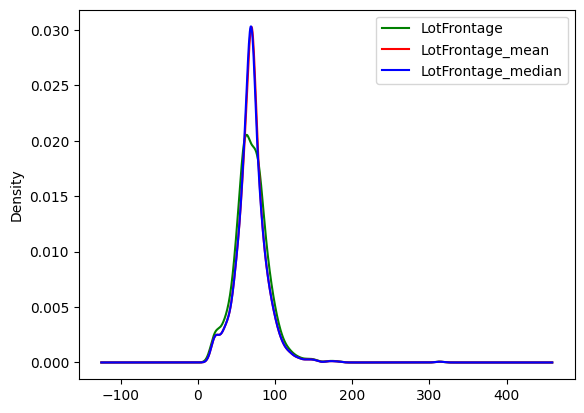

In [17]:
# Plot the distribution of the LotFrontage variable befor and after the imputing the missing values.
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the median
X_train['LotFrontage_mean'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='blue')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

> **Observation:**\
    1. The Missing Values Percentage Was = 17%\
    2. The distribution was already near to normal, so the mean and median were almost equal.\
    3. That's why, the mean_imputation & median_imputation distributions are almost equal.\
    4. Due to the same reason, distribution shape did not change much.\
    5. Kurtosis of the distribution is increased, after `mean` or `median` imputation.

- Find the `variance` of `LotFrontage` feature before & after imputing the missing values.

In [18]:
# Calculate the variance of the LotFrontage variable, before and after the imputing the missing values.
print('Variance before imputation: ', X_train['LotFrontage'].var() , '\n')
print('Variance after mean imputation: ', X_train['LotFrontage_mean'].var(), '\n')
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Variance before imputation:  526.5220651054822 

Variance after mean imputation:  430.87281248991764 

Variance after median imputation:  430.928870860774


> **Observation:**\
    - There is minor change in variance after mean or median imputation.\
    - The distribution was already near to normal, so the `mean` and `median` were almost equal.\
    - The variance is decreased little-bit due to data compression towards the central-value as `mean` or `median` used to impute the missing values.

- Plot the `boxplot` of `LotFrontage` feature, before and after imputating the missing values.

<Axes: >

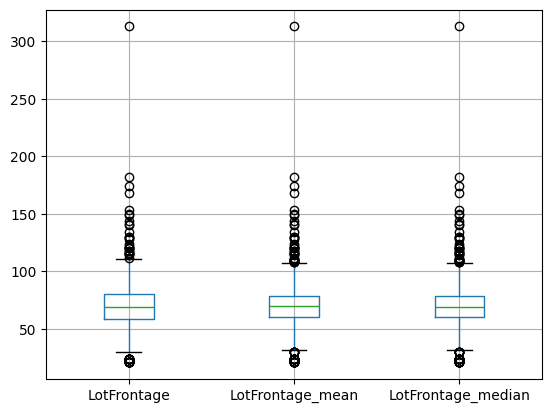

In [19]:
X_train[['LotFrontage', 'LotFrontage_mean', 'LotFrontage_median']].boxplot()

> **Observation:**\
    - Some new outliers introduce in the feature data.\
    - Data compressed around the `center` due imputation with `mean` or `median`, as the distribution was already near to normal.

- Plot the `ked` plots of `MasVnrArea` feature before and after imputating the missing values.

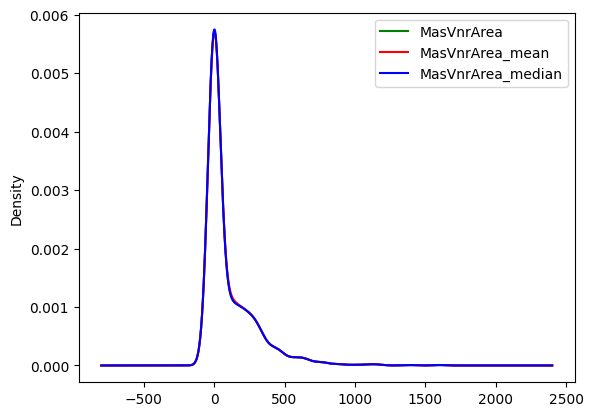

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the median
X_train['MasVnrArea_mean'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='blue')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

> **Observation:**\
    1. The Missing Values Percentage Was Only = 0.5%\
    2. Although, the distribution was not normal, and the `mean` or `median` could effect the distribution.\
    3. But due to very small amount of missing data, there is not even minor change in distribution.

- Find the `variance` of `MasVnrArea` feature before & after imputing the missing values.

In [21]:
# Calculate the variance of the MasVnrArea variable, before and after the imputing the missing values.
print('Variance before imputation: ', X_train['MasVnrArea'].var() , '\n')
print('Variance after mean imputation: ', X_train['MasVnrArea_mean'].var(), '\n')
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())


Variance before imputation:  33370.60300041031 

Variance after mean imputation:  33199.03177675781 

Variance after median imputation:  33253.804644122945


> **Observation:**\
    - There is minor change in variance after mean or median imputation.\
    - Although, the distribution was not normal, and the `mean` or `median` could change the variance.\
    - But due to very small amount of missing data (0.5%), `mean` or `median` could not effect much on variance.

- Plot the `boxplot` of `MasVnrArea` feature, before and after imputating the missing values.

<Axes: >

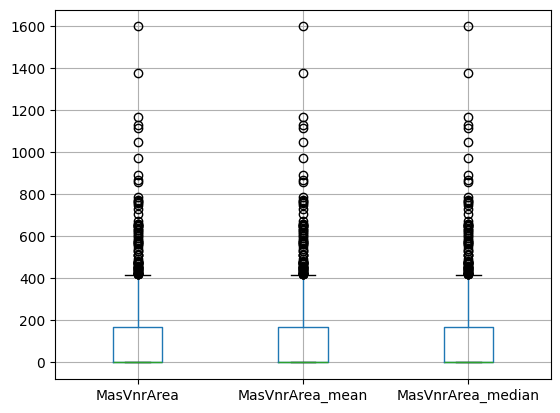

In [22]:
X_train[['MasVnrArea', 'MasVnrArea_mean', 'MasVnrArea_median']].boxplot()

> **Observation:**\
    - There is no change in boxplot, due to very small amount (0.5%) of missing data.

- Find the `Covariance` of the `LotFrontage` & `MasVnrArea` features with other numerical features.

In [23]:
# Print the Covariace table of only those numeric columns of X_train, in which we have imputed the missing values.
X_train.select_dtypes(include=['int64', 'float64']).cov()[['LotFrontage', 'LotFrontage_mean', 'LotFrontage_median', 'MasVnrArea', 'MasVnrArea_mean', 'MasVnrArea_median']]

,LotFrontage,LotFrontage_mean,LotFrontage_median,MasVnrArea,MasVnrArea_mean,MasVnrArea_median
OverallQual,7.114450,5.822022,5.834825,103.039399,102.509633,101.757585
GrLivArea,3860.143609,3158.900725,3156.116411,35442.639376,35260.415009,35149.866392
GarageCars,5.441568,4.453040,4.451744,49.441797,49.187597,48.977303
TotRmsAbvGrd,12.161873,9.952518,9.964324,77.148980,76.752327,76.687341
YearBuilt,90.798163,74.303553,73.861464,1762.693601,1753.630909,1735.749387
MasVnrArea,713.041708,583.507702,582.989149,33370.603000,33370.603000,33370.603000
LotFrontage,526.522065,526.522065,526.522065,713.041708,709.374285,702.772094
LotFrontage_mean,526.522065,430.872812,430.872812,583.507702,580.507662,575.104841
MasVnrArea_mean,709.374285,580.507662,579.991775,33370.603000,33199.031777,33199.031777
LotFrontage_median,526.522065,430.872812,430.928871,582.989149,579.991775,574.584106


> **Observation:**\
    - The covariance of `LotFrontage` feature is changed little bit after `mean` & `median` imputation.\
    - The covariance of `MasVnrArea` feature is also minor changed afteer `mean` & `median` imputation.

### <a id="simpleimputer_categorical">SimpleImputer is not Working</a>

- Apply the `SimpleImputer` object of `most_frequent` on categorical features to impute the missing values.

In [24]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

FireplaceQu    551
MasVnrType     707
MasVnrArea       6
GarageType      58
LotFrontage    212
Fence          954
dtype: int64

In [25]:
# Apply the mode_imputer instance to the categorical columns in the X_train & X_test.
X_train['Fence_mode'] = pd.DataFrame(mode_imputer.fit_transform(X_train[['Fence']]))
X_test['Fence_mode'] = pd.DataFrame(mode_imputer.transform(X_test[['Fence']]))

X_train['MasVnrType_mode'] = pd.DataFrame(mode_imputer.fit_transform(X_train[['MasVnrType']]))
X_test['MasVnrType_mode'] = pd.DataFrame(mode_imputer.transform(X_test[['MasVnrType']]))

X_train['FireplaceQu_mode'] = pd.DataFrame(mode_imputer.fit_transform(X_train[['FireplaceQu']]))
X_test['FireplaceQu_mode'] = pd.DataFrame(mode_imputer.transform(X_test[['FireplaceQu']]))

X_train['GarageType_mode'] = pd.DataFrame(mode_imputer.fit_transform(X_train[['GarageType']]))
X_test['GarageType_mode'] = pd.DataFrame(mode_imputer.transform(X_test[['GarageType']]))

In [26]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

FireplaceQu         551
MasVnrType          707
MasVnrArea            6
GarageType           58
LotFrontage         212
Fence               954
Fence_mode          241
MasVnrType_mode     241
FireplaceQu_mode    241
GarageType_mode     241
dtype: int64

`Note that:`, there are still missing values in the new imputed variables `Fence_mode` , `MasVnrType_mode` , `FireplaceQu_mode` and `GarageType_mode`.

#### The missing values in the categorical variables are not imputing with the `SimpleImputer`,
#### so we remove the missing values by using `pandas - fillna()` function.

In [27]:
# Impute the missing values in the categorical columns in the X_train & X_test.
X_train['Fence_mode'] = X_train['Fence'].fillna(X_train['Fence'].mode()[0])
X_test['Fence_mode'] = X_test['Fence'].fillna(X_train['Fence'].mode()[0])

X_train['MasVnrType_mode'] = X_train['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0])
X_test['MasVnrType_mode'] = X_test['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0])

X_train['FireplaceQu_mode'] = X_train['FireplaceQu'].fillna(X_train['FireplaceQu'].mode()[0])
X_test['FireplaceQu_mode'] = X_test['FireplaceQu'].fillna(X_train['FireplaceQu'].mode()[0])

X_train['GarageType_mode'] = X_train['GarageType'].fillna(X_train['GarageType'].mode()[0])
X_test['GarageType_mode'] = X_test['GarageType'].fillna(X_train['GarageType'].mode()[0])

In [28]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

FireplaceQu    551
MasVnrType     707
MasVnrArea       6
GarageType      58
LotFrontage    212
Fence          954
dtype: int64

`Note:` There are no missing values in the new imputed columns from the original ones.

- Plot the `barplots` of `Fence` feature before and after imputating the missing values.

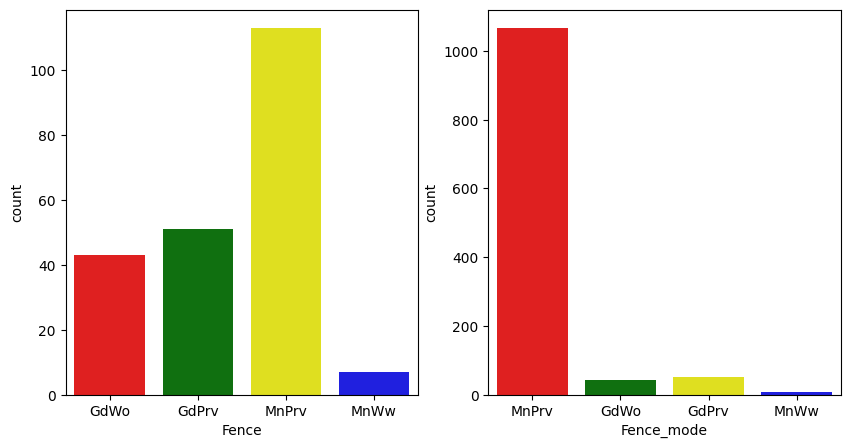

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Fence', data=X_train, palette=['red', 'green', 'yellow', 'blue'])

plt.subplot(1, 2, 2)
sns.countplot(x='Fence_mode', data=X_train, palette=['red', 'green', 'yellow', 'blue'])

plt.show()

> **Observation:**\
    - The above plot shows that the `most_frequent` value dominating, which will create biasness.\
    - It is also clearly shows that the `varicance` is also changed w.r.t each category.

- Plot the `KDE` of total outer area for the dominant category of `Fence` feature.

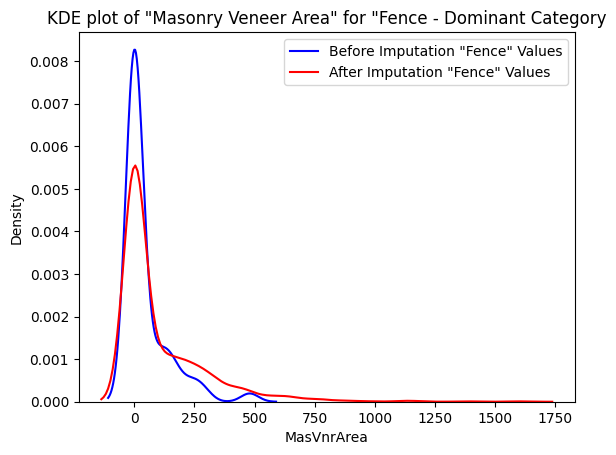

In [30]:
sns.kdeplot(X_train[X_train['Fence']=='MnPrv']['MasVnrArea'], color='blue', label='Before Imputation "Fence" Values')
sns.kdeplot(X_train[X_train['Fence_mode'] == 'MnPrv']['MasVnrArea'], color='red', label='After Imputation "Fence" Values')

# add legend with labels
plt.legend()

# add title
plt.title('KDE plot of "Masonry Veneer Area" for "Fence - Dominant Category')
plt.show()


> **Observation:**\
    - The above plot shows that the `biasness` created in the data, towards the `most-frequent category`.

- Plot the `barplots` of `MasVnrType` feature before and after imputating the missing values.

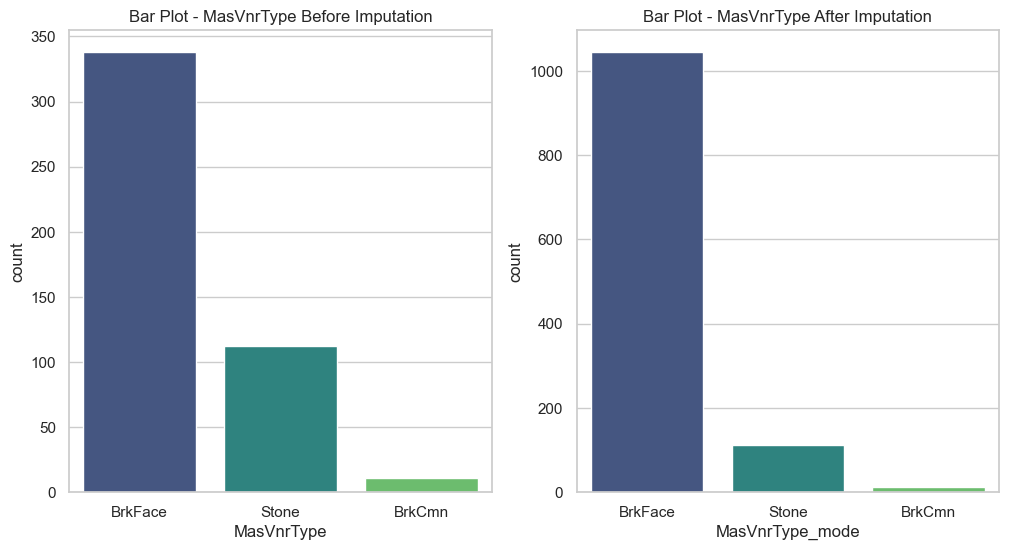

In [31]:
# Assuming 'categorical_feature1' and 'categorical_feature2' are the names of your categorical features
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot vertical bar plot for 'MasVnrType' feature
plt.subplot(1, 2, 1)
sns.countplot(x='MasVnrType', data=X_train, palette='viridis')
plt.title('Bar Plot - MasVnrType Before Imputation')

# Plot vertical bar plot for 'MasVnrType'.
plt.subplot(1, 2, 2)
sns.countplot(x= 'MasVnrType_mode', data=X_train, palette='viridis')
plt.title('Bar Plot - MasVnrType After Imputation')

plt.show()

- Plot the `KDE` of total outer area for the dominant category of `MasVnrType` feature.

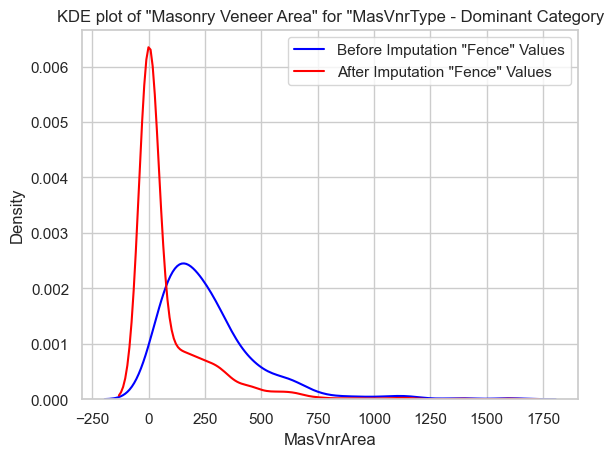

In [32]:
sns.kdeplot(X_train[X_train['MasVnrType']=='BrkFace']['MasVnrArea'], color='blue', label='Before Imputation "Fence" Values')
sns.kdeplot(X_train[X_train['MasVnrType_mode'] == 'BrkFace']['MasVnrArea'], color='red', label='After Imputation "Fence" Values')

# add legend with labels
plt.legend()

# add title
plt.title('KDE plot of "Masonry Veneer Area" for "MasVnrType - Dominant Category')
plt.show()


> **Observation:**\
    - The above plot shows that the `biasness` created in the data, towards the `most-frequent category`.

- Plot the `barplots` of `FireplaceQu` feature before and after imputating the missing values.

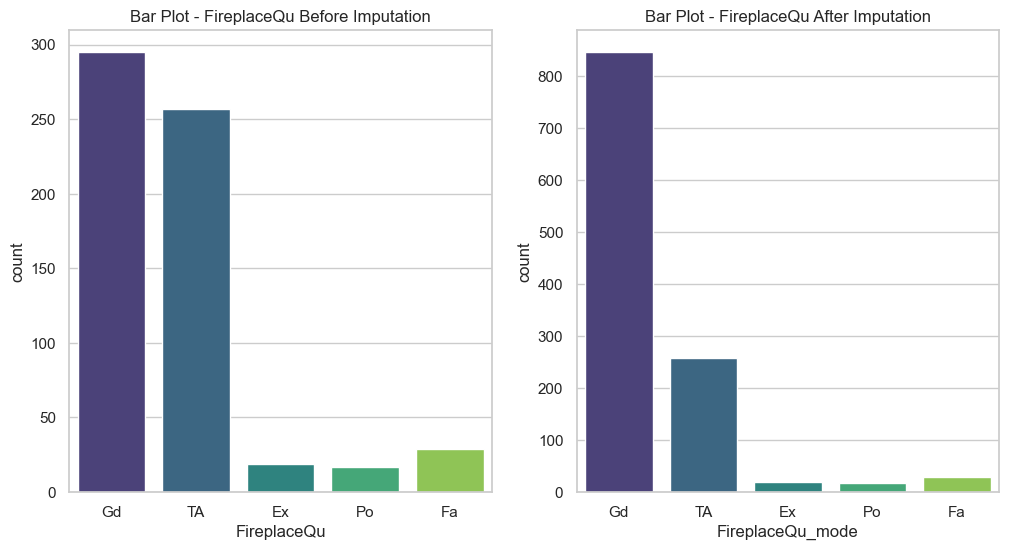

In [33]:
# Assuming 'categorical_feature1' and 'categorical_feature2' are the names of your categorical features
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot vertical bar plot for 'FireplaceQu' feature
plt.subplot(1, 2, 1)
sns.countplot(x='FireplaceQu', data=X_train, palette='viridis')
plt.title('Bar Plot - FireplaceQu Before Imputation')

# Plot vertical bar plot for 'FireplaceQu'.
plt.subplot(1, 2, 2)
sns.countplot(x='FireplaceQu_mode',data=X_train, palette='viridis')
plt.title('Bar Plot - FireplaceQu After Imputation')

# plt.tight_layout()
plt.show()


- Plot the `KDE` of `MasVnrArea` feature for the dominant category of `FireplaceQu` feature.

Text(0.5, 1.0, 'KDE plot of "Masonry Veneer Area" for "FireplaceQu - Dominant Category"')

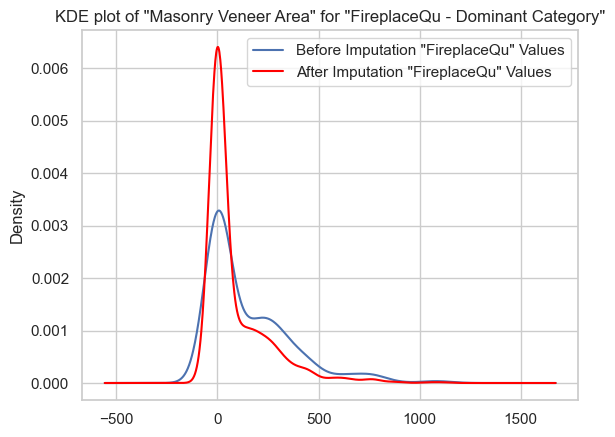

In [34]:
temp = X_train[X_train['FireplaceQu']=='Gd']['MasVnrArea']

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['FireplaceQu_mode'] == 'Gd']['MasVnrArea'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Before Imputation "FireplaceQu" Values', 'After Imputation "FireplaceQu" Values']
ax.legend(lines, labels, loc='best')

# add title
plt.title('KDE plot of "Masonry Veneer Area" for "FireplaceQu - Dominant Category"')

> **Observation:**\
    - The above plot shows that the `biasness` created in the data, towards the `most-frequent category`.

- Plot the `barplots` of `GarageType` feature before and after imputating the missing values.

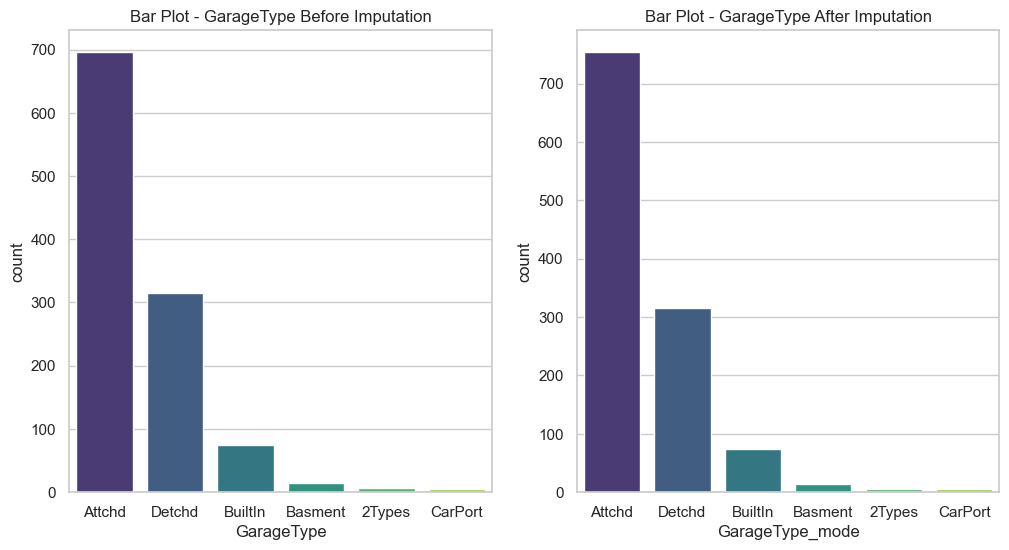

In [35]:
# Assuming 'categorical_feature1' and 'categorical_feature2' are the names of your categorical features
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot vertical bar plot for 'FireplaceQu' feature
plt.subplot(1, 2, 1)
sns.countplot(x='GarageType', data=X_train, palette='viridis')
plt.title('Bar Plot - GarageType Before Imputation')

# Plot vertical bar plot for 'FireplaceQu'.
plt.subplot(1, 2, 2)
sns.countplot(x='GarageType_mode', data=X_train, palette='viridis')
plt.title('Bar Plot - GarageType After Imputation')

# plt.tight_layout()
plt.show()

- Plot the `KDE` of `GarageType` feature for the dominant category of `FireplaceQu` feature.

Text(0.5, 1.0, 'KDE plot of "Masonry Veneer Area" for "GarageType - Dominant Category"')

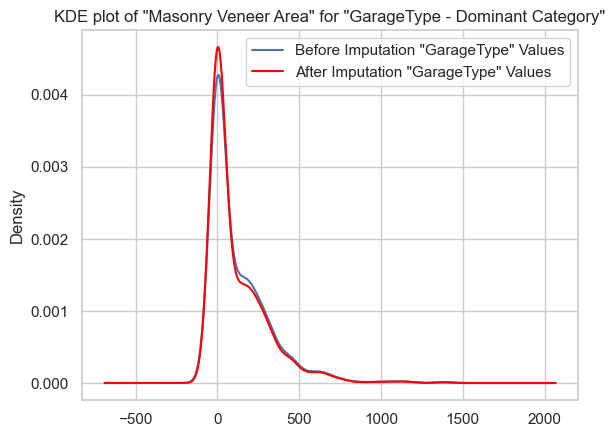

In [36]:
temp = X_train[X_train['GarageType']=='Attchd']['MasVnrArea']

fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
X_train[X_train['GarageType_mode'] == 'Attchd']['MasVnrArea'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Before Imputation "GarageType" Values', 'After Imputation "GarageType" Values']
ax.legend(lines, labels, loc='best')

# add title
plt.title('KDE plot of "Masonry Veneer Area" for "GarageType - Dominant Category"')

> **Observation:**\
    - The above plot shows that there is just `minor change` in the data, due to very `small amount` of missing data.

#### **Accuracy of LinearRegression by Using `Mean & Mode Imputation`**

In [37]:
# Separate the input and output variables.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Import the 'train_test_split' function from the 'sklearn.model_selection' library.
from sklearn.model_selection import train_test_split

# Split the train and test data from the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
# Display the columns where there are missing values in 'X_train'.
X_train.isnull().sum()[X_train.isnull().sum() > 0]

FireplaceQu    551
MasVnrType     707
MasVnrArea       6
GarageType      58
LotFrontage    212
Fence          954
dtype: int64

In [39]:
# Fill the missing data in 'LotFrontage' & 'MasVnrArea' columns with the 'mean' of the corresponding columns.
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(X_train['LotFrontage'].mean())
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_train['LotFrontage'].mean())

X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].mean())
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(X_train['MasVnrArea'].mean())

# Fill the missing data in 'Fence' 'GarageType', 'MasVnrType', 'FireplaceQu' columns with the 'mode' of the corresponding columns.
X_train['Fence'] = X_train['Fence'].fillna(X_train['Fence'].mode()[0])
X_test['Fence'] = X_test['Fence'].fillna(X_train['Fence'].mode()[0])

X_train['GarageType'] = X_train['GarageType'].fillna(X_train['GarageType'].mode()[0])
X_test['GarageType'] = X_test['GarageType'].fillna(X_train['GarageType'].mode()[0])

X_train['MasVnrType'] = X_train['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0])
X_test['MasVnrType'] = X_test['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0])

X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna(X_train['FireplaceQu'].mode()[0])
X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna(X_train['FireplaceQu'].mode()[0])

In [40]:
# Verify the missing values are filled or not.
print(X_train.isnull().sum()[X_train.isnull().sum() > 0].sort_values(ascending=False))
print(X_test.isnull().sum()[X_test.isnull().sum() > 0].sort_values(ascending=False))

Series([], dtype: int64)
Series([], dtype: int64)


In [41]:
# Identify the categorical columuns, as we have to encode them before applying the LinearRegression model.
X_train.select_dtypes(include=['object']).columns

Index(['ExterQual', 'KitchenQual', 'FireplaceQu', 'MasVnrType', 'HeatingQC',
       'GarageType', 'SaleCondition', 'Fence', 'Utilities'],
      dtype='object')

In [42]:
# `ExterQual`, `KitchenQual`, `HeatingQC`, 'Utilities`, `Fence`, `FireplaceQu` are oridinal categorical variables.
# So, we can use the 'OrdinalEncoder' class from the 'sklearn.preprocessing' library.

# Import the 'OrdinalEncoder' class from the 'sklearn.preprocessing' library.
from sklearn.preprocessing import OrdinalEncoder

# Creating the instance of the 'OrdinalEncoder' class.
fence_ordinal_encoder = OrdinalEncoder(categories=[['MnWw', 'GdWo', 'MnPrv', 'GdPrv']])
fireplacequ_ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
utilities_ordinal_encoder = OrdinalEncoder(categories=[['ELO', 'NoSeWa', 'NoSewr', 'AllPub']])
heatingqc_ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
kitchenqual_ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
extqual_ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Apply the 'ordinal_encoder' instance to the all ordinal categorical columns in the X_train & X_test.

X_train['Fence'] = pd.Series(fence_ordinal_encoder.fit_transform(X_train[['Fence']]).flatten(), index=X_train.index)
X_test['Fence'] = pd.Series(fence_ordinal_encoder.transform(X_test[['Fence']]).flatten(), index=X_test.index)

X_train['FireplaceQu'] = pd.Series(fireplacequ_ordinal_encoder.fit_transform(X_train[['FireplaceQu']]).flatten(), index=X_train.index)
X_test['FireplaceQu'] = pd.Series(fireplacequ_ordinal_encoder.transform(X_test[['FireplaceQu']]).flatten(), index=X_test.index)

X_train['Utilities'] = pd.Series(utilities_ordinal_encoder.fit_transform(X_train[['Utilities']]).flatten(), index=X_train.index)
X_test['Utilities'] = pd.Series(utilities_ordinal_encoder.transform(X_test[['Utilities']]).flatten(), index=X_test.index)

X_train['HeatingQC'] = pd.Series(heatingqc_ordinal_encoder.fit_transform(X_train[['HeatingQC']]).flatten(), index=X_train.index)
X_test['HeatingQC'] = pd.Series(heatingqc_ordinal_encoder.transform(X_test[['HeatingQC']]).flatten(), index=X_test.index)

X_train['KitchenQual'] = pd.Series(kitchenqual_ordinal_encoder.fit_transform(X_train[['KitchenQual']]).flatten(), index=X_train.index)
X_test['KitchenQual'] = pd.Series(kitchenqual_ordinal_encoder.transform(X_test[['KitchenQual']]).flatten(), index=X_test.index)

X_train['ExterQual'] = pd.Series(extqual_ordinal_encoder.fit_transform(X_train[['ExterQual']]).flatten(), index=X_train.index)
X_test['ExterQual'] = pd.Series(extqual_ordinal_encoder.transform(X_test[['ExterQual']]).flatten(), index=X_test.index)


In [43]:
X_train.isnull().sum()[X_train.isnull().sum() > 0]

Series([], dtype: int64)

In [44]:
# Identify the remaining categorical columuns, as we have to encode them before applying the LinearRegression model.
X_train.select_dtypes(include=['object']).columns

Index(['MasVnrType', 'GarageType', 'SaleCondition'], dtype='object')

In [45]:
# Import the 'OneHotEncoder' class from the 'sklearn.preprocessing' library.
from sklearn.preprocessing import OneHotEncoder

# Creating the list of categorical features to apply OneHotEncoder.
columns_to_encode = list(X_train.select_dtypes(include=['object']).columns)

# Create the instance of the 'OneHotEncoder' class.
ohe = OneHotEncoder(sparse=False, drop='first')

# Droping the index of X_train & X_test dataframes before encoding, to avoid mismatch of indicies with encoded dataframes.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Write the function to encode (one-hot-encode) the categorical columns in X_train & X_test.
for col in columns_to_encode:
    train_col_ohe = ohe.fit_transform(X_train[[col]])
    test_col_ohe = ohe.transform(X_test[[col]])

    train_col_ohe_df = pd.DataFrame(train_col_ohe, columns=ohe.get_feature_names_out([col]))
    test_col_ohe_df = pd.DataFrame(test_col_ohe, columns=ohe.get_feature_names_out([col]))

    train_col_ohe_df = train_col_ohe_df.reset_index(drop=True)
    test_col_ohe_df = test_col_ohe_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_col_ohe_df], axis=1)
    X_test = pd.concat([X_test, test_col_ohe_df], axis=1)

    X_train = X_train.drop(columns=col)
    X_test = X_test.drop(columns=col)

In [46]:
# Import the 'LinearRegression' from the 'sklearn.linear_model'.
from sklearn.linear_model import LinearRegression

# Create an instance of the 'LinearRegression'.
linear_model = LinearRegression()

# Apply the 'linear_model' instance to the 'X_train' and 'y_train'.
linear_model.fit(X_train, y_train)

# Apply the 'linear_model' instance to the 'X_test'.
y_pred = linear_model.predict(X_test)

linear_model.score(X_test, y_test)

0.6711612958414632

In [47]:
# Import MSE, MAE, R2 from the 'sklearn.metrics' library.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')
print('MAE: ', mean_absolute_error(y_test, y_pred), '\n')
print('R2: ', r2_score(y_test, y_pred))


RMSE:  47654.0738371465 

MAE:  26235.264571567684 

R2:  0.6711612958414632


---

##### **<a id="random_imputation">2. Random Values Imputation**</a>

[Back to Content List](#content_list)

+ **Repeated work regarding the dataset preparating.**

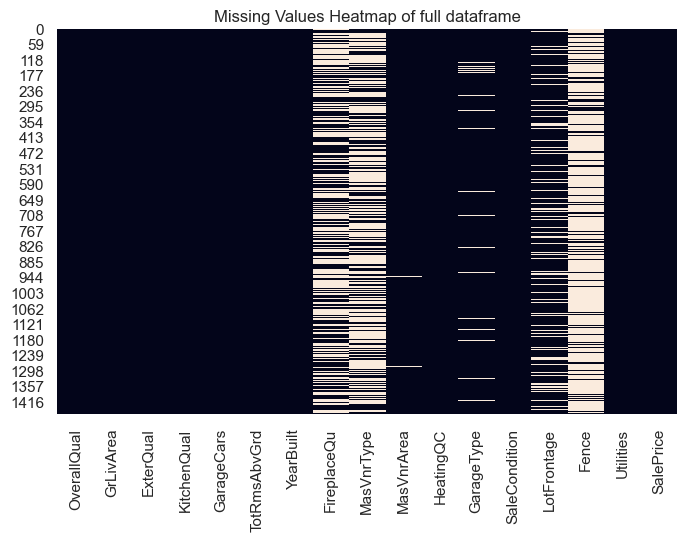

The percentage of missing values in different columns of X_train:
Fence          65.342466
MasVnrType     48.424658
FireplaceQu    37.739726
LotFrontage    14.520548
GarageType      3.972603
MasVnrArea      0.410959
dtype: float64

The percentage of missing values in different columns of X_train:


Fence          15.410959
MasVnrType     11.301370
FireplaceQu     9.520548
LotFrontage     3.219178
GarageType      1.575342
MasVnrArea      0.136986
dtype: float64

In [48]:
# importing the training dataset.
df = pd.read_csv('../House_Prices_Prediction/train.csv')

# Creating the list of categorical features, those we will keep.
test_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'GarageType', 'SaleCondition', 'LotFrontage', 'Fence', 'Utilities']
train_features = test_features + ['SalePrice']

# Subsetting the dataset with the required features.
df = df[train_features]

# Separate the input and output features.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the train and test data from the X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the heatmap to display the missing values.
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap of full dataframe')
plt.show()

# display the percentage of missing values in the columns where the sum-of-missing-values is greater than 0.
print("The percentage of missing values in different columns of X_train:")
print((X_train.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False))
print("\nThe percentage of missing values in different columns of X_train:")
(X_test.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False)

+ **Imputing the Missing Data by `random values`.**

In [49]:
# Extract the list of columns containing missing values.
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['FireplaceQu',
 'MasVnrType',
 'MasVnrArea',
 'GarageType',
 'LotFrontage',
 'Fence']

In [50]:
# Imputing the missing values.
for col in missing_columns:
    X_train[col][X_train[col].isnull()] = X_train[col].dropna().sample(X_train[col].isnull().sum(), replace=True).values
    X_test[col][X_test[col].isnull()] = X_test[col].dropna().sample(X_test[col].isnull().sum(), replace=True).values

+ **Encode the `categorical` columns into `numerical`**

In [51]:
# Import the 'OneHotEncoder' class from the 'sklearn.preprocessing' library.
from sklearn.preprocessing import OneHotEncoder

# Creating the list of categorical features to apply OneHotEncoder.
columns_to_encode = list(X_train.select_dtypes(include=['object']).columns)

# Create the instance of the 'OneHotEncoder' class.
ohe = OneHotEncoder(sparse=False, drop='first')

# Droping the index of X_train & X_test dataframes before encoding, to avoid mismatch of indicies with encoded dataframes.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Write the function to encode (one-hot-encode) the categorical columns in X_train & X_test.
for col in columns_to_encode:
    train_col_ohe = ohe.fit_transform(X_train[[col]])
    test_col_ohe = ohe.transform(X_test[[col]])

    train_col_ohe_df = pd.DataFrame(train_col_ohe, columns=ohe.get_feature_names_out([col]))
    test_col_ohe_df = pd.DataFrame(test_col_ohe, columns=ohe.get_feature_names_out([col]))

    train_col_ohe_df = train_col_ohe_df.reset_index(drop=True)
    test_col_ohe_df = test_col_ohe_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_col_ohe_df], axis=1)
    X_test = pd.concat([X_test, test_col_ohe_df], axis=1)

    X_train = X_train.drop(columns=col)
    X_test = X_test.drop(columns=col)

+ **Apply the `Linear Regression` model.**

In [52]:
# Import the 'LinearRegression' from the 'sklearn.linear_model'.
from sklearn.linear_model import LinearRegression

# Create an instance of the 'LinearRegression'.
linear_model = LinearRegression()

# Apply the 'linear_model' instance to the 'X_train' and 'y_train'.
linear_model.fit(X_train, y_train)

# Apply the 'linear_model' instance to the 'X_test'.
y_pred = linear_model.predict(X_test)

linear_model.score(X_test, y_test)

0.6877604529042958

In [53]:
# Import MSE, MAE, R2 from the 'sklearn.metrics' library.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')
print('MAE: ', mean_absolute_error(y_test, y_pred), '\n')
print('R2: ', r2_score(y_test, y_pred))


RMSE:  46435.75632065616 

MAE:  24716.466247675668 

R2:  0.6877604529042958


---

##### **<a id="forward_backword_imputation">3. Forward Fill / Backward Fill Imputation**</a>

[Back to Content List](#content_list)

+ **Repeated Work regarding the Dataset preparation.**

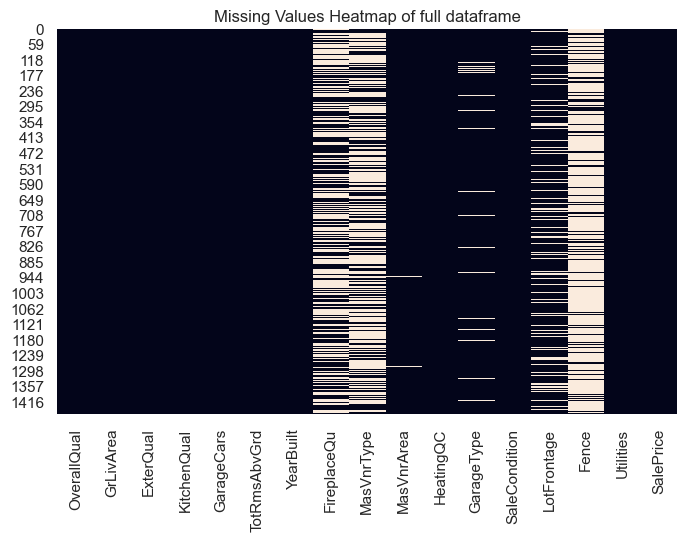

The percentage of missing values in different columns of X_train:
Fence          65.342466
MasVnrType     48.424658
FireplaceQu    37.739726
LotFrontage    14.520548
GarageType      3.972603
MasVnrArea      0.410959
dtype: float64

The percentage of missing values in different columns of X_train:


Fence          15.410959
MasVnrType     11.301370
FireplaceQu     9.520548
LotFrontage     3.219178
GarageType      1.575342
MasVnrArea      0.136986
dtype: float64

In [54]:
# importing the training dataset.
df = pd.read_csv('../House_Prices_Prediction/train.csv')

# Creating the list of categorical features, those we will keep.
test_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'GarageType', 'SaleCondition', 'LotFrontage', 'Fence', 'Utilities']
train_features = test_features + ['SalePrice']

# Subsetting the dataset with the required features.
df = df[train_features]

# Separate the input and output features.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the train and test data from the X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the heatmap to display the missing values.
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap of full dataframe')
plt.show()

# display the percentage of missing values in the columns where the sum-of-missing-values is greater than 0.
print("The percentage of missing values in different columns of X_train:")
print((X_train.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False))
print("\nThe percentage of missing values in different columns of X_train:")
(X_test.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False)

+ **Imputing the Missing Data through `Forward Fill` and `Backword Fill`.**

In [55]:
# Extract the list of columns containing missing values.
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['FireplaceQu',
 'MasVnrType',
 'MasVnrArea',
 'GarageType',
 'LotFrontage',
 'Fence']

In [56]:
# Imputing the missing values through forward fill.
for col in missing_columns:
    X_train[col] = X_train[col].fillna(method='ffill')
    X_test[col] = X_test[col].fillna(method='ffill')

In [57]:
# Impute the remaining missing values through backward fill.
for col in missing_columns:
    X_train[col] = X_train[col].fillna(method='bfill')
    X_test[col] = X_test[col].fillna(method='bfill')

+ **Encode the `categorical` columns into `numerical`**.

In [58]:
# Import the 'OneHotEncoder' class from the 'sklearn.preprocessing' library.
from sklearn.preprocessing import OneHotEncoder

# Creating the list of categorical features to apply OneHotEncoder.
columns_to_encode = list(X_train.select_dtypes(include=['object']).columns)

# Create the instance of the 'OneHotEncoder' class.
ohe = OneHotEncoder(sparse=False, drop='first')

# Droping the index of X_train & X_test dataframes before encoding, to avoid mismatch of indicies with encoded dataframes.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Write the function to encode (one-hot-encode) the categorical columns in X_train & X_test.
for col in columns_to_encode:
    train_col_ohe = ohe.fit_transform(X_train[[col]])
    test_col_ohe = ohe.transform(X_test[[col]])

    train_col_ohe_df = pd.DataFrame(train_col_ohe, columns=ohe.get_feature_names_out([col]))
    test_col_ohe_df = pd.DataFrame(test_col_ohe, columns=ohe.get_feature_names_out([col]))

    train_col_ohe_df = train_col_ohe_df.reset_index(drop=True)
    test_col_ohe_df = test_col_ohe_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_col_ohe_df], axis=1)
    X_test = pd.concat([X_test, test_col_ohe_df], axis=1)

    X_train = X_train.drop(columns=col)
    X_test = X_test.drop(columns=col)

+ Apply the `Linear Regression` model.

In [59]:
# Import the 'LinearRegression' from the 'sklearn.linear_model'.
from sklearn.linear_model import LinearRegression

# Create an instance of the 'LinearRegression'.
linear_model = LinearRegression()

# Apply the 'linear_model' instance to the 'X_train' and 'y_train'.
linear_model.fit(X_train, y_train)

# Apply the 'linear_model' instance to the 'X_test'.
y_pred = linear_model.predict(X_test)

linear_model.score(X_test, y_test)

0.6840946262205363

In [60]:
# Import MSE, MAE, R2 from the 'sklearn.metrics' library.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')
print('MAE: ', mean_absolute_error(y_test, y_pred), '\n')
print('R2: ', r2_score(y_test, y_pred))

RMSE:  46707.54879185421 

MAE:  25417.59524347193 

R2:  0.6840946262205363


---

##### **<a id="knn_imputation">4. K-Nearest Neighbors (KNN) Imputation**</a>

[Back to Content List](#content_list)

+ **Repeated Work regarding the Dataset Preparation.**

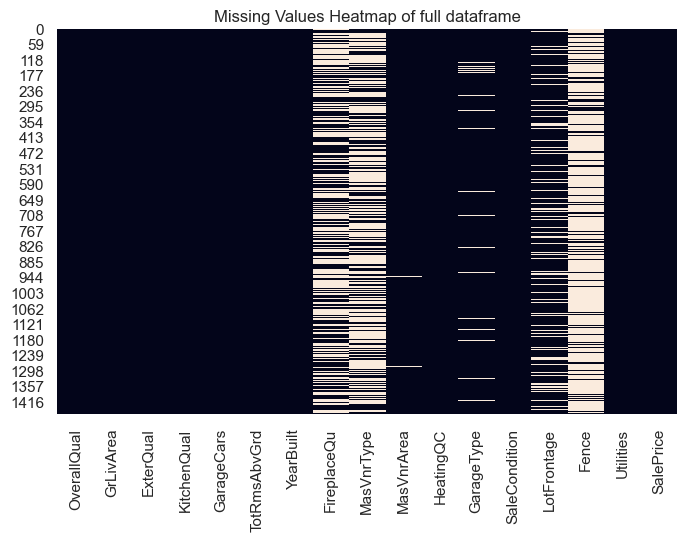

The percentage of missing values in different columns of X_train:
Fence          65.342466
MasVnrType     48.424658
FireplaceQu    37.739726
LotFrontage    14.520548
GarageType      3.972603
MasVnrArea      0.410959
dtype: float64

The percentage of missing values in different columns of X_train:


Fence          15.410959
MasVnrType     11.301370
FireplaceQu     9.520548
LotFrontage     3.219178
GarageType      1.575342
MasVnrArea      0.136986
dtype: float64

In [61]:
# importing the training dataset.
df = pd.read_csv('../House_Prices_Prediction/train.csv')

# Creating the list of categorical features, those we will keep.
test_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'GarageType', 'SaleCondition', 'LotFrontage', 'Fence', 'Utilities']
train_features = test_features + ['SalePrice']

# Subsetting the dataset with the required features.
df = df[train_features]

# Separate the input and output features.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the train and test data from the X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the heatmap to display the missing values.
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap of full dataframe')
plt.show()

# display the percentage of missing values in the columns where the sum-of-missing-values is greater than 0.
print("The percentage of missing values in different columns of X_train:")
print((X_train.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False))
print("\nThe percentage of missing values in different columns of X_train:")
(X_test.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False)

+ **Imputing the Missing Data through `KNN` Imputation**

In [62]:
# Extract the list of columns containing missing values.
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['FireplaceQu',
 'MasVnrType',
 'MasVnrArea',
 'GarageType',
 'LotFrontage',
 'Fence']

In [63]:
# Extract a sub-list containing numerical columns from the 'missing_columns' list.
numerical_missing_columns = [col for col in missing_columns if X_train[col].dtype in ['int64', 'float64']]

# Extract a sub-list containing categorical columns from the 'missing_columns' list.
categorical_missing_columns = [col for col in missing_columns if X_train[col].dtype == 'object']

In [64]:
# Apply the KNN imputation to the numerical columns.
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
X_train[numerical_missing_columns] = knn_imputer.fit_transform(X_train[numerical_missing_columns])
X_test[numerical_missing_columns] = knn_imputer.fit_transform(X_test[numerical_missing_columns])

# Apply the 'random-values' imputation technique to the categorical columns.
for col in categorical_missing_columns:
    X_train[col][X_train[col].isnull()] = X_train[col].dropna().sample(X_train[col].isnull().sum(), replace=True).values
    X_test[col][X_test[col].isnull()] = X_test[col].dropna().sample(X_test[col].isnull().sum(), replace=True).values

+ **Encode the `categorical` columns into `numerical`.**

In [65]:
# Import the 'OneHotEncoder' class from the 'sklearn.preprocessing' library.
from sklearn.preprocessing import OneHotEncoder

# Creating the list of categorical features to apply OneHotEncoder.
columns_to_encode = list(X_train.select_dtypes(include=['object']).columns)

# Create the instance of the 'OneHotEncoder' class.
ohe = OneHotEncoder(sparse=False, drop='first')

# Droping the index of X_train & X_test dataframes before encoding, to avoid mismatch of indicies with encoded dataframes.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Write the function to encode (one-hot-encode) the categorical columns in X_train & X_test.
for col in columns_to_encode:
    train_col_ohe = ohe.fit_transform(X_train[[col]])
    test_col_ohe = ohe.transform(X_test[[col]])

    train_col_ohe_df = pd.DataFrame(train_col_ohe, columns=ohe.get_feature_names_out([col]))
    test_col_ohe_df = pd.DataFrame(test_col_ohe, columns=ohe.get_feature_names_out([col]))

    train_col_ohe_df = train_col_ohe_df.reset_index(drop=True)
    test_col_ohe_df = test_col_ohe_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_col_ohe_df], axis=1)
    X_test = pd.concat([X_test, test_col_ohe_df], axis=1)

    X_train = X_train.drop(columns=col)
    X_test = X_test.drop(columns=col)

+ **Apply the `Linear Regression` model.**

In [66]:
# Import the 'LinearRegression' from the 'sklearn.linear_model'.
from sklearn.linear_model import LinearRegression

# Create an instance of the 'LinearRegression'.
linear_model = LinearRegression()

# Apply the 'linear_model' instance to the 'X_train' and 'y_train'.
linear_model.fit(X_train, y_train)

# Apply the 'linear_model' instance to the 'X_test'.
y_pred = linear_model.predict(X_test)

linear_model.score(X_test, y_test)

0.6795255378401027

In [67]:
# Import MSE, MAE, R2 from the 'sklearn.metrics' library.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')
print('MAE: ', mean_absolute_error(y_test, y_pred), '\n')
print('R2: ', r2_score(y_test, y_pred))

RMSE:  47044.112840726295 

MAE:  25477.250191696392 

R2:  0.6795255378401027


---

##### **<a id="iterative_imputation">5. Multivariate Iterative Imputation**</a>

[Back to Content List](#content_list)

+ **Repeated Work regarding the Dataset Preparation**

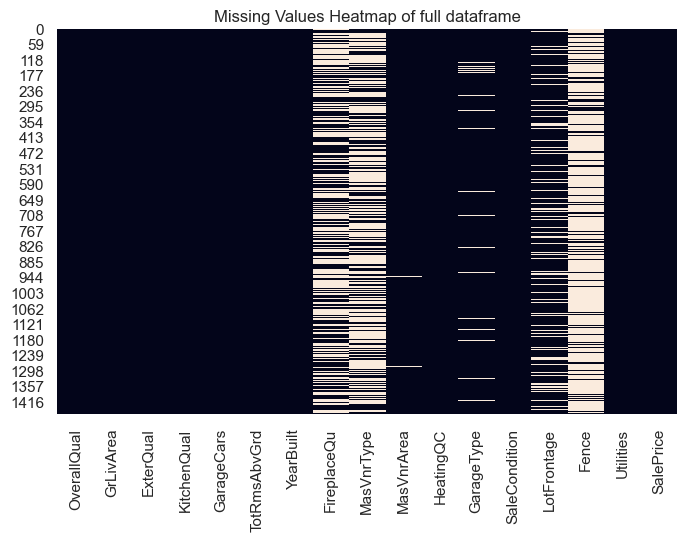

The percentage of missing values in different columns of X_train:
Fence          65.342466
MasVnrType     48.424658
FireplaceQu    37.739726
LotFrontage    14.520548
GarageType      3.972603
MasVnrArea      0.410959
dtype: float64

The percentage of missing values in different columns of X_train:


Fence          15.410959
MasVnrType     11.301370
FireplaceQu     9.520548
LotFrontage     3.219178
GarageType      1.575342
MasVnrArea      0.136986
dtype: float64

In [68]:
# importing the training dataset.
df = pd.read_csv('../House_Prices_Prediction/train.csv')

# Creating the list of categorical features, those we will keep.
test_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'GarageType', 'SaleCondition', 'LotFrontage', 'Fence', 'Utilities']
train_features = test_features + ['SalePrice']

# Subsetting the dataset with the required features.
df = df[train_features]

# Separate the input and output features.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the train and test data from the X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the heatmap to display the missing values.
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap of full dataframe')
plt.show()

# display the percentage of missing values in the columns where the sum-of-missing-values is greater than 0.
print("The percentage of missing values in different columns of X_train:")
print((X_train.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False))
print("\nThe percentage of missing values in different columns of X_train:")
(X_test.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False)

+ **Imputing the Missing Values through `Miltivariate Iterative Method`**.

In [69]:
# Extract the list of columns containing missing values.
missing_columns = df.columns[df.isnull().any()].tolist()
missing_columns

['FireplaceQu',
 'MasVnrType',
 'MasVnrArea',
 'GarageType',
 'LotFrontage',
 'Fence']

In [70]:
# Extract a sub-list containing numerical columns from the 'missing_columns' list.
numerical_missing_columns = [col for col in missing_columns if X_train[col].dtype in ['int64', 'float64']]

# Extract a sub-list containing categorical columns from the 'missing_columns' list.
categorical_missing_columns = [col for col in missing_columns if X_train[col].dtype == 'object']

In [71]:
# Apply the 'random-values' imputation technique to the categorical columns.
for col in categorical_missing_columns:
    X_train[col][X_train[col].isnull()] = X_train[col].dropna().sample(X_train[col].isnull().sum(), replace=True).values
    X_test[col][X_test[col].isnull()] = X_test[col].dropna().sample(X_test[col].isnull().sum(), replace=True).values

In [72]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Apply the 'multivariate iterative imputation' technique to the numerical columns.
iterative_imputer = IterativeImputer()
X_train[numerical_missing_columns] = iterative_imputer.fit_transform(X_train[numerical_missing_columns])
X_test[numerical_missing_columns] = iterative_imputer.fit_transform(X_test[numerical_missing_columns])

+ **Encode the `categorical` columns into `numerical`**

In [73]:
# Import the 'OneHotEncoder' class from the 'sklearn.preprocessing' library.
from sklearn.preprocessing import OneHotEncoder

# Creating the list of categorical features to apply OneHotEncoder.
columns_to_encode = list(X_train.select_dtypes(include=['object']).columns)

# Create the instance of the 'OneHotEncoder' class.
ohe = OneHotEncoder(sparse=False, drop='first')

# Droping the index of X_train & X_test dataframes before encoding, to avoid mismatch of indicies with encoded dataframes.
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Write the function to encode (one-hot-encode) the categorical columns in X_train & X_test.
for col in columns_to_encode:
    train_col_ohe = ohe.fit_transform(X_train[[col]])
    test_col_ohe = ohe.transform(X_test[[col]])

    train_col_ohe_df = pd.DataFrame(train_col_ohe, columns=ohe.get_feature_names_out([col]))
    test_col_ohe_df = pd.DataFrame(test_col_ohe, columns=ohe.get_feature_names_out([col]))

    train_col_ohe_df = train_col_ohe_df.reset_index(drop=True)
    test_col_ohe_df = test_col_ohe_df.reset_index(drop=True)

    X_train = pd.concat([X_train, train_col_ohe_df], axis=1)
    X_test = pd.concat([X_test, test_col_ohe_df], axis=1)

    X_train = X_train.drop(columns=col)
    X_test = X_test.drop(columns=col)

+ Apply the `Linear Regression` model.

In [74]:
# Import the 'LinearRegression' from the 'sklearn.linear_model'.
from sklearn.linear_model import LinearRegression

# Create an instance of the 'LinearRegression'.
linear_model = LinearRegression()

# Apply the 'linear_model' instance to the 'X_train' and 'y_train'.
linear_model.fit(X_train, y_train)

# Apply the 'linear_model' instance to the 'X_test'.
y_pred = linear_model.predict(X_test)

linear_model.score(X_test, y_test)

0.679206364846159

In [75]:
# Import MSE, MAE, R2 from the 'sklearn.metrics' library.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')
print('MAE: ', mean_absolute_error(y_test, y_pred), '\n')
print('R2: ', r2_score(y_test, y_pred))

RMSE:  47067.53354255697 

MAE:  25528.94593615703 

R2:  0.679206364846159


---

##### **6. Missing Indicator**

+ **Repeated Work regarding the Dataset preparation**

In [1]:
# importing the training dataset.
df = pd.read_csv('../House_Prices_Prediction/train.csv')

# Creating the list of categorical features, those we will keep.
test_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'MasVnrType', 'MasVnrArea', 'HeatingQC', 'GarageType', 'SaleCondition', 'LotFrontage', 'Fence', 'Utilities']
train_features = test_features + ['SalePrice']

# Subsetting the dataset with the required features.
df = df[train_features]

# Separate the input and output features.
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split the train and test data from the X and y.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the heatmap to display the missing values.
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap of full dataframe')
plt.show()

# display the percentage of missing values in the columns where the sum-of-missing-values is greater than 0.
print("The percentage of missing values in different columns of X_train:")
print((X_train.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False))
print("\nThe percentage of missing values in different columns of X_train:")
(X_test.isnull().sum()[df.isnull().sum() > 0] / df.shape[0] * 100).sort_values(ascending=False)

NameError: name 'pd' is not defined

+ **Mention the `Nan Values` as `Missing Data` by using the `Missing Indicator`**.

---

##### **Conclustion:**